# INF 791 - Redes Complexas | Trabalho Prático

Aluno: José Júlio Alves Campolina

Matrícula: 102022

## Configuração inicial

### Importação de pacotes

In [38]:
from google.colab import drive
import os
import json

import numpy as np
import pandas as pd

import networkx as nx
from networkx.readwrite import json_graph

import matplotlib.pyplot as plt

from statistics import mean

### Definição de ambiente

In [39]:
drive.mount('/content/drive', force_remount=True)
folder = '/content/drive/MyDrive/INF 791 (Redes Complexas)/trabalho_final/'
os.chdir(folder)

Mounted at /content/drive


## Coleta de Dados

#### Importação da base de dados

##### Artistas


In [40]:
artists = pd.read_csv('artists.csv')
artists

,id,name,genres,popularity,followers,degree,mined_at
0,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,"conscious hip hop,hip hop,rap,west coast rap",90,28656288,0,2024-05-13 00:25:23.576
1,3TVXtAsR1Inumwj472S9r4,Drake,"canadian hip hop,canadian pop,hip hop,pop rap,rap",93,87528011,1,2024-05-13 00:42:03.235
2,1RyvyyTE3xzB2ZywiAwp0i,Future,"atl hip hop,hip hop,rap,southern hip hop,trap",90,16941914,1,2024-05-13 00:28:59.885
3,0iEtIxbK0KxaSlF7G42ZOp,Metro Boomin,rap,90,8027605,1,2024-05-13 00:28:59.897
4,7tYKF4w9nC0nq9CsPZTHyP,SZA,"pop,r&b,rap",88,19787815,1,2024-05-13 00:28:59.898
...,...,...,...,...,...,...,...
16988,55vjGKmlvpOxuYjwGjBKrD,MATZ,hokkaido indie,30,1518,6,NaN
16989,70xKWQ1IGhrMV75N3OKcqA,Mc Calvin,trap funk,30,1389,6,NaN
16990,0fVsDLtoHfzKS8nsocu0G3,Matthew James Thomas,"broadway,show tunes",30,1214,6,NaN
16991,0tWshaiF7jgT3BxuKt72qp,TWK,indian edm,30,1181,6,NaN


##### Colaborações

In [41]:
feats = pd.read_csv('feats.csv')
feats

,artist1_id,artist2_id,average_popularity,artist1,artist2,track_names,track_total
0,1Yj5Xey7kTwvZla8sqdsdE,7CvTknweLr9feJtRGrpDBy,98.0,Cris Mj,FloyyMenor,Gata Only,1
1,0iEtIxbK0KxaSlF7G42ZOp,2YZyLoL8N0Wb9xBt1NhZWg,95.0,Metro Boomin,Kendrick Lamar,Like That,1
2,1pPmIToKXyGdsCF6LmqLmI,7c0XG5cIJTrrAgEC3ULPiq,93.0,Rich The Kid,Ty Dolla $ign,CARNIVAL,1
3,1pPmIToKXyGdsCF6LmqLmI,5K4W6rqBFWDnAN6FQUkS6x,93.0,Rich The Kid,Kanye West,CARNIVAL,1
4,1pPmIToKXyGdsCF6LmqLmI,699OTQXzgjhIYAHMy9RyPD,93.0,Rich The Kid,Playboi Carti,CARNIVAL,1
...,...,...,...,...,...,...,...
75019,1ZAujONMGo6GGiHxDQCGeA,3jdZ2CpOnEmspXf9CyVkmK,0.0,Cuban Link,Peedi Crakk,What Do We Have Here,1
75020,1s2DqKGaElgMSZsQlH8qRD,22099GssG7Ood0d5UIh2wo,0.0,Stacious,Serani,Badmind,1
75021,2hZ6jVi1cao5VlJHAEPzU7,7r8xR0LmnaAM623MmRDn1V,0.0,GLC,Max Frost,Russian Roulette,1
75022,37G8DfNgO4mQ3PKh5droSo,3YgwtcjB89K3jjvK0dvL34,0.0,"Osmani Garcia ""La Voz""",El Kamel,LA MAREA,1


## Geração do grafo

#### Criando grafo

In [42]:
G = nx.Graph()

In [43]:
for index, row in artists.iterrows():
    G.add_node(row['id'], name=row['name'], popularity=row['popularity'], degree=row['degree'])

In [44]:
for index, row in feats.iterrows():
  G.add_edge(row['artist1_id'], row['artist2_id'], popularity=row['average_popularity'], name=row['track_names'].replace('$', 'S'), total=row['track_total'])

In [45]:
print(f'Número de componentes do grafo gerado: {nx.number_connected_components(G)}')

H = G.subgraph(nx.node_connected_component(G, n=artists['id'][0]))

print(f'Número de componentes do grafo começando do primeiro artista {nx.number_connected_components(H)}')

Número de componentes do grafo gerado: 483
Número de componentes do grafo começando do primeiro artista 1


In [46]:
print('Artistas/nodes: ', H.number_of_nodes())
print('Colaborações/arestas: ', H.number_of_edges())

Artistas/nodes:  16399
Colaborações/arestas:  74899


#### Plotando o grafo

In [47]:
colors = [i/len(H.nodes) for i in range(len(H.nodes))]

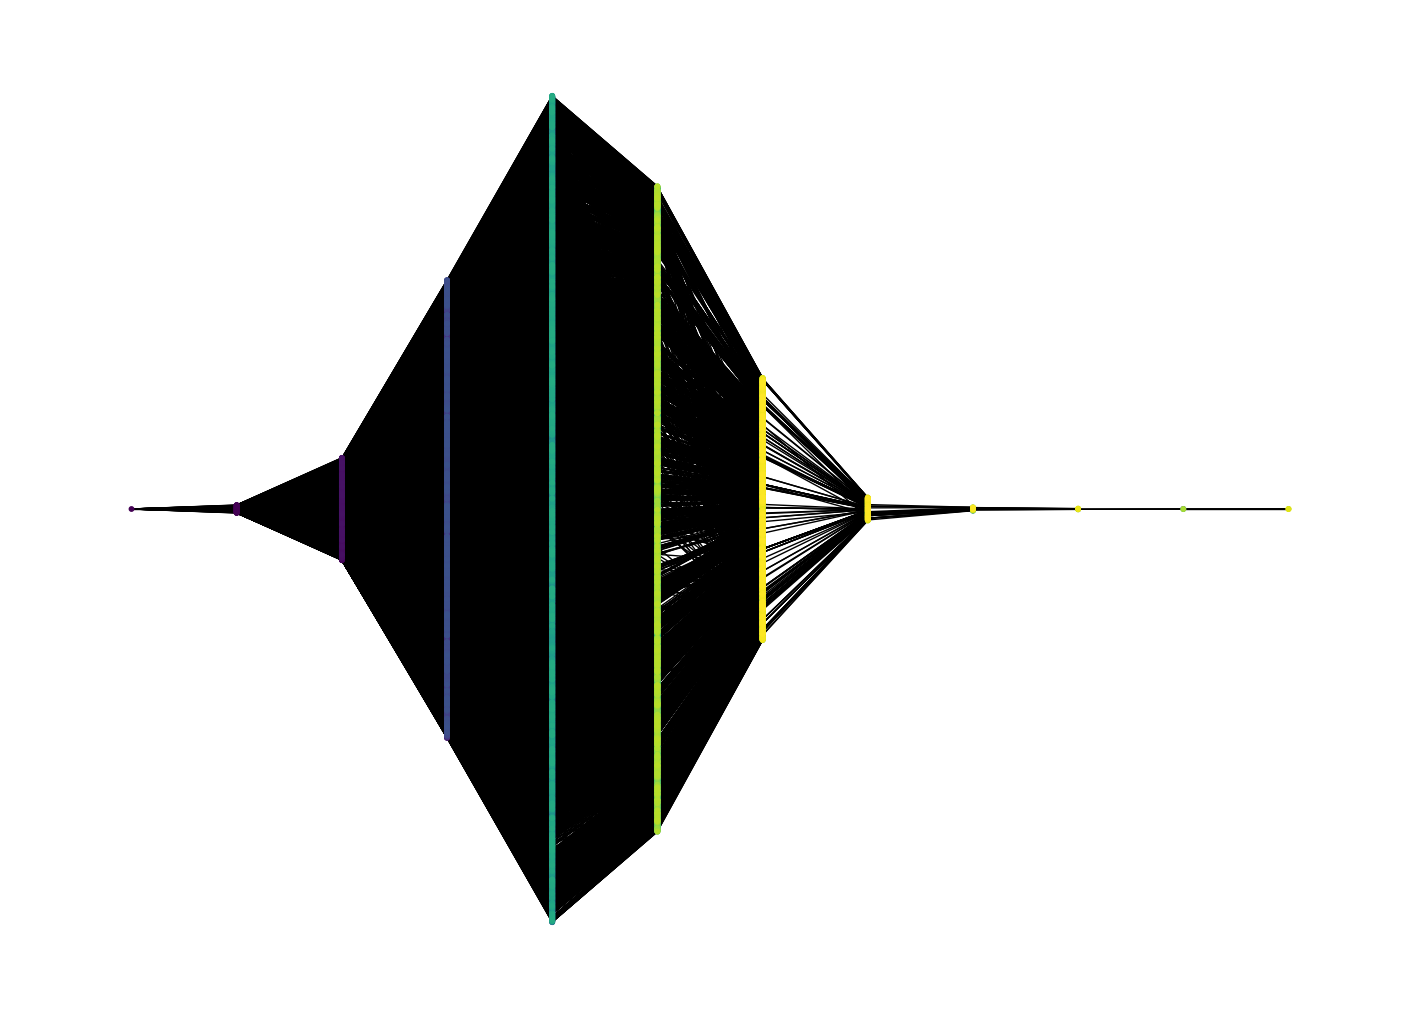

In [48]:
plt.figure(figsize=(14, 10))
pos = nx.bfs_layout(H, start='2YZyLoL8N0Wb9xBt1NhZWg', scale=2)

nx.draw(H, pos, with_labels=False, node_color=colors, edge_color='black', node_size=10)

# plt.title("Grafo de colaboração entre artistas com bfs layout")
plt.show()

#### Visualização do grafo como rede complexa


In [13]:
nx.write_gexf(H, "grafo.gexf")

In [14]:
data = json_graph.node_link_data(H)

with open('graph.json', 'w') as f:
    json.dump(data, f)


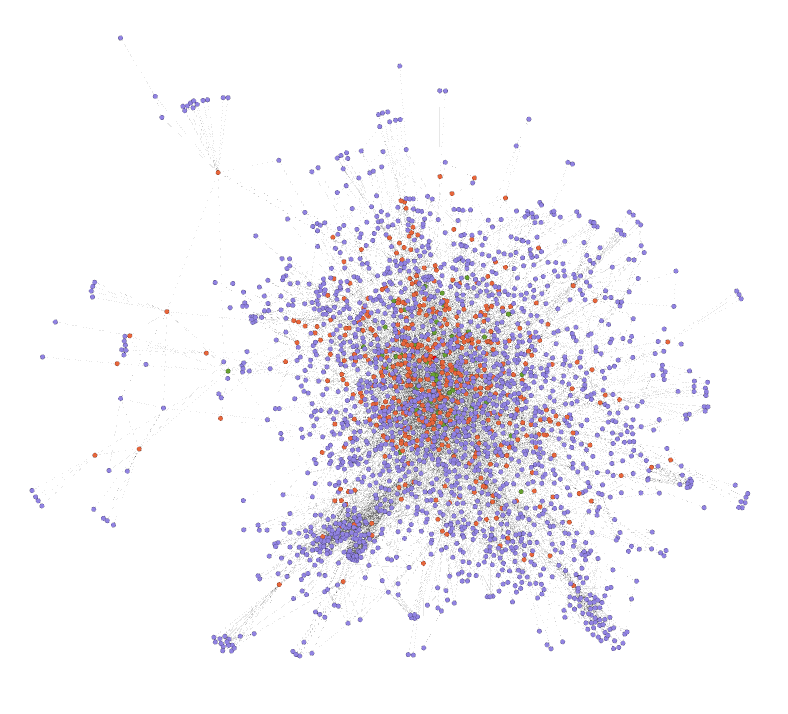

Legenda

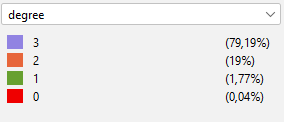

## Análise dos dados

### Explorando gêneros musicais

In [15]:
generos_por_artista = artists['genres']

generos_por_artista = generos_por_artista.str.split(',')

all_genres = [genre for genres_list in generos_por_artista for genre in genres_list]

generos = pd.Series(all_genres).value_counts()

In [16]:
generos_df = generos.reset_index()
generos_df.columns = ['Genre', 'Count']

# Print the genres ordered by count
for i, (genre, count) in enumerate(generos_df.itertuples(index=False), start=1):
      print(f"{i}º - {genre} - {count}")

      if(i > 100): break

1º - funk mtg - 259
2º - urbano latino - 231
3º - filmi - 225
4º - modern bollywood - 215
5º - electro house - 198
6º - pop - 193
7º - pop dance - 189
8º - french hip hop - 188
9º - reggaeton - 179
10º - trap latino - 178
11º - edm - 175
12º - rap - 168
13º - trap - 167
14º - afrobeats - 162
15º - r&b - 158
16º - german hip hop - 158
17º - nigerian pop - 154
18º - polish hip hop - 154
19º - alternative r&b - 152
20º - hip hop - 148
21º - uk hip hop - 147
22º - dance pop - 143
23º - punjabi pop - 141
24º - funk carioca - 140
25º - pop urbaine - 138
26º - latin pop - 135
27º - covertronica - 133
28º - corrido - 131
29º - progressive electro house - 131
30º - house - 129
31º - southern hip hop - 123
32º - dirty south rap - 122
33º - uk dance - 121
34º - pop rap - 121
35º - trap brasileiro - 118
36º - progressive house - 116
37º - urban contemporary - 116
38º - k-rap - 115
39º - italian hip hop - 115
40º - pop edm - 114
41º - amapiano - 112
42º - brostep - 111
43º - dutch house - 110
44º -

### Artistas com mais colaborações

In [37]:
artist_colab = list(feats['artist1']) + list(feats['artist2'])

unique_artists, counts = np.unique(artist_colab, return_counts=True)

sorted_indices = np.argsort(-counts)
top_5_artists = unique_artists[sorted_indices]
top_5_counts = counts[sorted_indices]

for x in range(5, 10):
  display(artists[artists['name'] == top_5_artists[x]])
  print(f'Total de Colaborações: {top_5_counts[x]}')

,id,name,genres,popularity,followers,degree,mined_at
4273,5f4QpKfy7ptCHwTqspnSJI,Neha Kakkar,"filmi,modern bollywood",70,45810857,4,2024-05-30 22:27:43.263


Total de Colaborações: 135


,id,name,genres,popularity,followers,degree,mined_at
110,12vb80Km0Ew53ABfJOepVz,Ñengo Flow,"reggaeton,trap latino,urbano latino",77,5886666,2,2024-05-13 00:49:11.603


Total de Colaborações: 133


,id,name,genres,popularity,followers,degree,mined_at
67,1mcTU81TzQhprhouKaTkpq,Rauw Alejandro,"puerto rican pop,reggaeton,trap latino,urbano ...",86,21572892,2,2024-05-13 00:49:11.581


Total de Colaborações: 130


,id,name,genres,popularity,followers,degree,mined_at
4232,7uIbLdzzSEqnX0Pkrb56cR,Yo Yo Honey Singh,"filmi,hindi hip hop,modern bollywood",71,17437868,4,2024-05-30 22:12:42.265


Total de Colaborações: 125


,id,name,genres,popularity,followers,degree,mined_at
98,7hJcb9fa4alzcOq3EaNPoG,Snoop Dogg,"g funk,gangster rap,hip hop,pop rap,rap,west c...",78,11598103,2,2024-05-13 00:49:11.636


Total de Colaborações: 125


## Análise da rede complexa

### b) Calcule e plote a distribuição do grau dos nodos desse grafo. Calcule também o grau médio do grafo. Discuta os resultados.

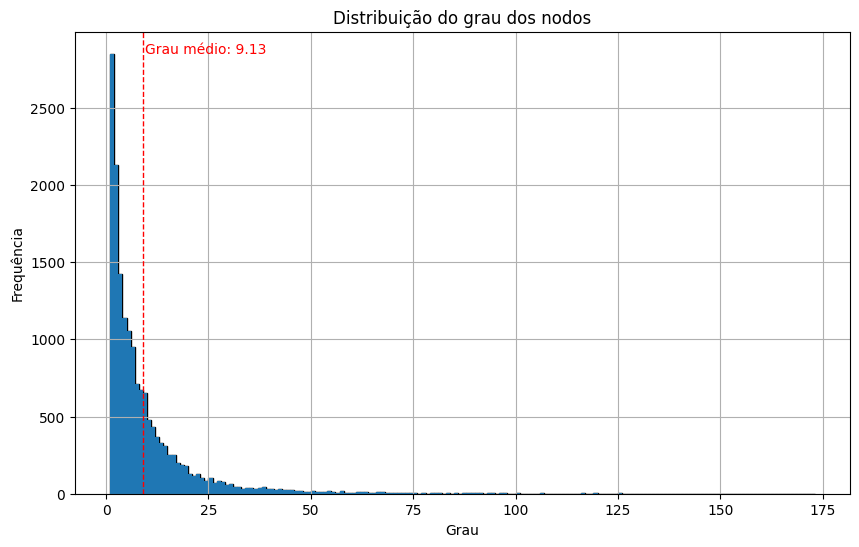

In [ ]:
degrees = [degree for node, degree in H.degree]

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), color='skyblue', edgecolor='black')
plt.axvline(mean(degrees), color='red', linestyle='dashed', linewidth=1)

plt.title('Distribuição do grau dos nodos')
plt.xlabel('Grau')
plt.ylabel('Frequência')

plt.text(mean(degrees) + 0.5, max(plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1))[0]), f'Grau médio: {mean(degrees):.2f}', color='red')

plt.grid(True)
plt.show()

O histograma da distribuição do grau dos nodos revela uma rede com predominância de artistas com poucas colaborações, evidenciada pelo baixo grau médio.

No entanto, a presença de outliers indica que alguns artistas têm um número significativamente maior de colaborações, agindo sendo pontos chaves dentro da rede, podendo influenciar fortemente a dinâmica de colaborações na indústria musical, sugerindo uma estrutura de rede desigual com implicações importantes para estratégias de marketing e propagação de novas músicas.

### d) Calcule o coeficiente de clusterizção de cada nodo e plote a distribuição. Calcule também o coeficiente de clusterização global do grafo.


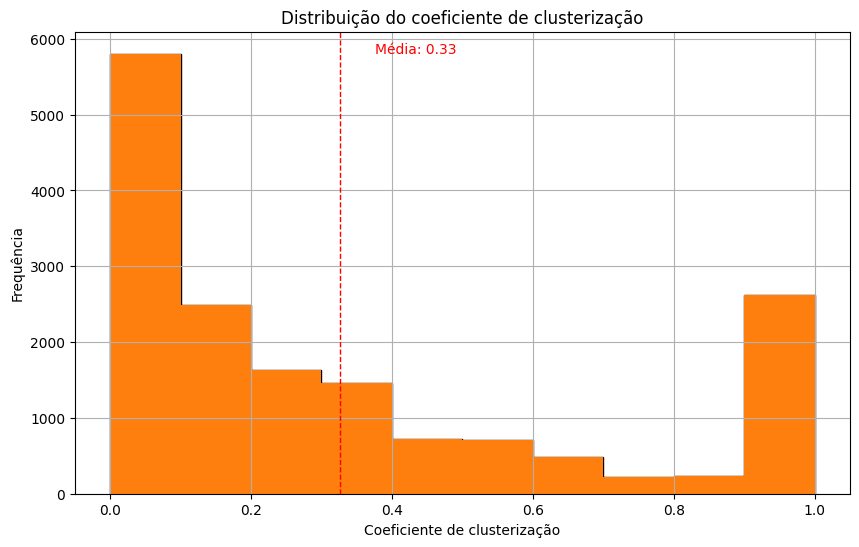

In [ ]:
coefficients = [coefficient for node, coefficient in nx.clustering(H).items()]
average_clustering = nx.average_clustering(H)

plt.figure(figsize=(10, 6))
plt.hist(coefficients, edgecolor='black')

plt.title('Distribuição do coeficiente de clusterização')
plt.xlabel('Coeficiente de clusterização')
plt.ylabel('Frequência')

plt.axvline(average_clustering, color='red', linestyle='dashed', linewidth=1)
plt.text(average_clustering + 0.05, max(plt.hist(coefficients)[0]), f'Média: {average_clustering:.2f}', color='red')

plt.grid(True)
plt.show()

### f) Calcule o overlap da vizinhança para cada par de nodo e plote a distribuição dos valores encontrados.


#### Função para calcular o overlap da vizinhança entre dois nós


In [ ]:
def calculate_overlap(G):
    overlap_values = []
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 != node2:
                neighbors1 = set(G.neighbors(node1))
                neighbors2 = set(G.neighbors(node2))
                overlap = len(neighbors1.intersection(neighbors2)) / len(neighbors1.union(neighbors2))
                overlap_values.append(overlap)
    return overlap_values

#### Plotando o overlap

In [ ]:
overlap_values = calculate_overlap(H)

plt.hist(overlap_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição do Overlap da Vizinhança')
plt.xlabel('Valor de Overlap')
plt.ylabel('Frequência')
plt.show()

### g) Calcule a distância média e a distribuição das distâncias de todos os nodos da rede.


In [ ]:
all_pairs_distances = dict(nx.all_pairs_shortest_path_length(H))

# Calcular a distância média
total_distances = 0
num_pairs = 0
for source, distances in all_pairs_distances.items():
    for target, distance in distances.items():
        total_distances += distance
        num_pairs += 1

average_distance = total_distances / num_pairs
plt.axvline(average_distance, color='red', linestyle='dashed', linewidth=1)
plt.text(average_distance + 0.5, max(plt.hist(coefficients)[0]), f'Média: {average_distance:.2f}', color='red')

# Calcular a distribuição das distâncias
distances_list = []
for source, distances in all_pairs_distances.items():
    for target, distance in distances.items():
        distances_list.append(distance)

# Plotar a distribuição das distâncias
plt.hist(distances_list, bins=range(max(distances_list)+1), color='skyblue', edgecolor='black')
plt.title('Distribuição das Distâncias entre Todos os Nós')
plt.xlabel('Distância')
plt.ylabel('Frequência')
plt.show()

KeyboardInterrupt: 